# Análise Quantitativa de Repasses Federais: RN vs. PB (2023-2025)

## 1. Visão Geral do Projeto

Este projeto realiza uma análise quantitativa comparativa dos repasses financeiros federais (como FPM, FUNDEB e Royalties) para todos os municípios dos estados do Rio Grande do Norte (RN) e da Paraíba (PB) durante o período de 2023 a 2025.

Seguindo a metodologia de **Ciência de Dados**, esta análise transforma **Dados** brutos em **Informação** (Agregações e Totais) e, por fim, em **Conhecimento** (Insights sobre Risco e Distribuição Per Capita).

## 2. Objetivos e Metodologia

Seguindo o **Método Estatístico**, este notebook busca responder a 5 perguntas-chave:

1.  **Análise Macro:** Qual estado (RN ou PB) recebeu o maior volume total de transferências?
2.  **Análise Temporal:** Como evoluiu o recebimento mensal de cada estado?
3.  **Análise de Composição:** Qual a composição das transferências (FPM, FUNDEB, etc.)?
4.  **Análise de Risco (Dispersão):** Qual fonte de receita (FPM ou Royalties) é mais **volátil** e representa maior risco ao planejamento?
5.  **Análise Per Capita (Contextualização):** Quais municípios *realmente* recebem mais quando ajustamos pela **população (IBGE)**?

---
**Fonte de Dados Primária:** [Acesse o dataset no Kaggle](https://www.kaggle.com/code/jadsonchagas/analise-repasses-uniao-rn-pb) 

**Fonte de Dados Secundária:** IBGE (Censo 2022) 

**Ferramentas:** Python (Pandas, Matplotlib, Seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- Configurações de Visualização ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")

# Função auxiliar para formatar os eixos dos gráficos em Bilhões/Milhões
def format_currency(value, pos):
    if value >= 1e9:
        return f'R$ {value/1e9:.1f}B'
    if value >= 1e6:
        return f'R$ {value/1e6:.1f}M'
    return f'R$ {value:,.0f}'

print("Bibliotecas importadas e ambiente configurado.")

Bibliotecas importadas e ambiente configurado.


In [2]:
# --- 1. CARGA DOS DADOS ---

FILE_PATH = "/kaggle/input/repasses-do-tesouro-aos-municpios-br-2023-25/transferencias_municipios_BR_limpo (2023-2025).csv" 

try:
    df_completo = pd.read_csv(FILE_PATH, sep=';', decimal='.')
    print(f"Dataset carregado com sucesso. Total de {len(df_completo):,} linhas.")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em {FILE_PATH}")
    print("Por favor, verifique o caminho e tente novamente.")

# --- 2. FILTRAGEM INICIAL ---
# Focar apenas em RN e PB
estados_alvo = ['RN', 'PB']
df_rn_pb = df_completo[df_completo['UF'].isin(estados_alvo)].copy()

print(f"Dados filtrados para RN e PB. Total de {len(df_rn_pb):,} linhas restantes.")

# --- 3. VERIFICAÇÃO ---
print("\nAmostra dos dados filtrados:")
print(df_rn_pb.head())
print("\nTipos de dados:")
df_rn_pb.info()

Dataset carregado com sucesso. Total de 2,549,448 linhas.
Dados filtrados para RN e PB. Total de 180,627 linhas restantes.

Amostra dos dados filtrados:
      Município  UF   ANO  Mês  1º Decêndio  2º Decêndio  3º Decêndio  \
38084    Aguiar  PB  2023    1        46.32         0.00         0.00   
38085    Aguiar  PB  2023    1   451,768.17   171,814.64   400,277.03   
38086    Aguiar  PB  2023    1    40,617.54    15,681.52    36,013.79   
38087    Aguiar  PB  2023    1        35.68        17.73         9.67   
38088    Aguiar  PB  2023    1        19.71         0.73         1.09   

      Item transferência      Transferência  Valor_Total   AnoMes  
38084   CIDE/Combustível  CIDE-Combustíveis        46.32  2023-01  
38085                FPM                FPM 1,023,859.84  2023-01  
38086                FPM             FUNDEB    92,312.85  2023-01  
38087            IPI-EXP             FUNDEB        63.08  2023-01  
38088                ITR             FUNDEB        21.53  2023-01  


## Seção 1: Análise Descritiva Macro (Transformando Dados em Informação)

Nesta seção, responderemos às perguntas de nível superior. Vamos agregar os dados para obter uma visão geral dos dois estados, focando no "O Quê?", "Quanto?" e "Quando?".

--- Valor Total Recebido por Estado (2023-2025) ---
| UF   |       Valor_Total |
|:-----|------------------:|
| PB   | 29,586,454,496.06 |
| RN   | 22,355,443,954.02 |


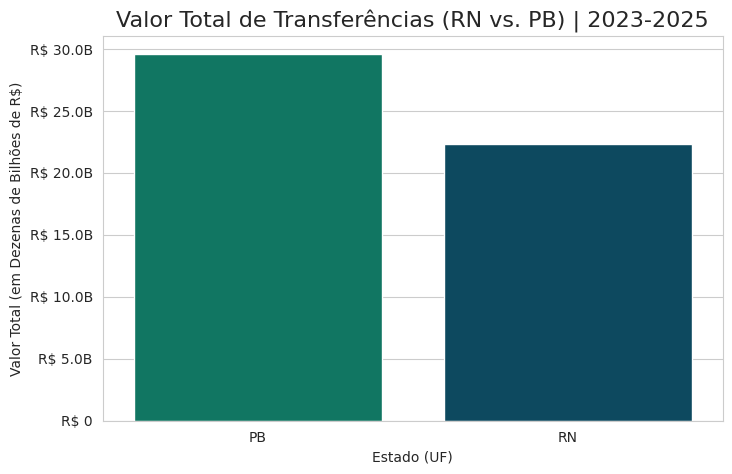

In [3]:
# PERGUNTA 1: Qual estado recebeu mais?
total_por_estado = df_rn_pb.groupby('UF')['Valor_Total'].sum().sort_values(ascending=False)

print("--- Valor Total Recebido por Estado (2023-2025) ---")
print(total_por_estado.to_markdown(floatfmt=",.2f"))

# --- Visualização ---
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=total_por_estado.index, 
    y=total_por_estado.values,
    palette=['#00876c', '#004f6c'] # Cores do seu notebook original
)
ax.set_title('Valor Total de Transferências (RN vs. PB) | 2023-2025', fontsize=16)
ax.set_ylabel('Valor Total (em Dezenas de Bilhões de R$)')
ax.set_xlabel('Estado (UF)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(format_currency))
plt.show()

--- Amostra da Evolução Mensal (RN vs. PB) ---
| AnoMes   |               PB |             RN |
|:---------|-----------------:|---------------:|
| 2023-01  |   969,457,246.12 | 650,744,802.89 |
| 2023-02  |   999,749,702.27 | 789,255,542.75 |
| 2023-03  | 1,034,311,459.87 | 834,093,324.85 |
| 2023-04  |   701,033,395.54 | 587,560,296.27 |
| 2023-05  |   843,833,464.36 | 649,675,099.59 |


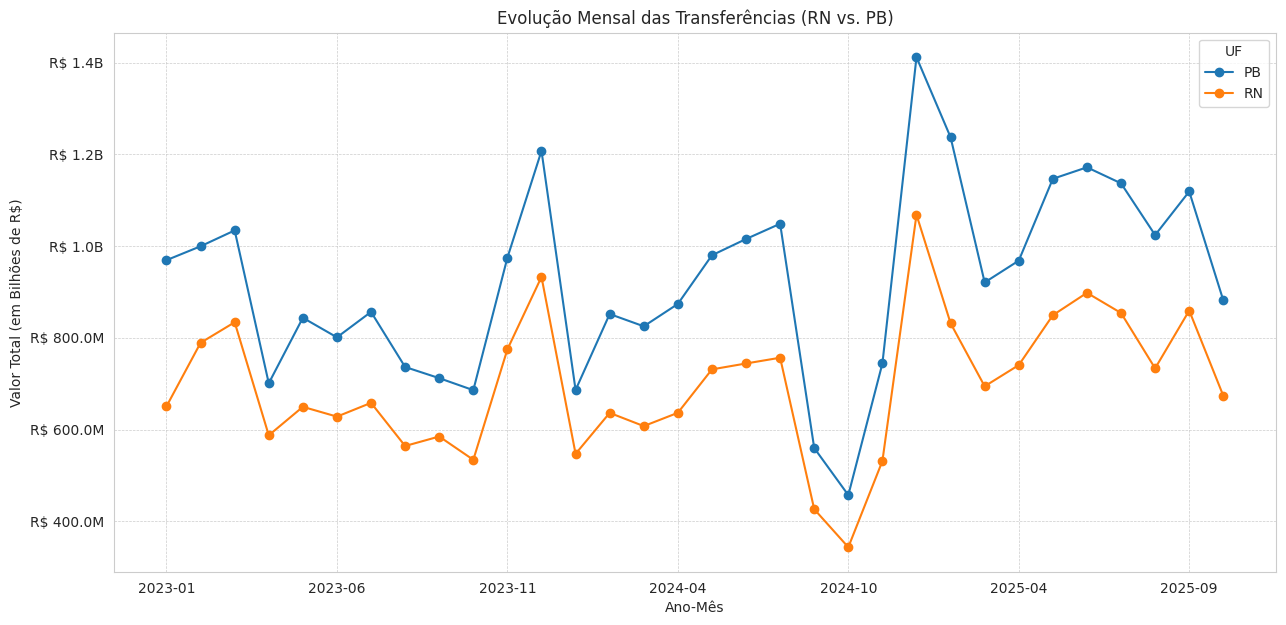

In [4]:
# PERGUNTA 2: Como foi a evolução mensal?
total_mensal = df_rn_pb.groupby(['AnoMes', 'UF'])['Valor_Total'].sum().unstack()

print("--- Amostra da Evolução Mensal (RN vs. PB) ---")
print(total_mensal.head().to_markdown(floatfmt=",.2f"))

# --- Visualização (Gráfico de Linha) ---
ax = total_mensal.plot(
    kind='line', 
    figsize=(15, 7), 
    marker='o',
    title='Evolução Mensal das Transferências (RN vs. PB)'
)
ax.set_ylabel('Valor Total (em Bilhões de R$)')
ax.set_xlabel('Ano-Mês')
ax.legend(title='UF')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(format_currency))
plt.show()

--- Composição das Transferências (% do Total por Estado) ---
|                     |   PB |   RN |
|:--------------------|-----:|-----:|
| AFM/AFE             |  nan |  nan |
| AJUSTE FUNDEB       |  nan |  nan |
| CIDE-Combustíveis   |  nan |  nan |
| FPM                 |  nan |  nan |
| FPM 1%              |  nan |  nan |
| FUNDEB              |  nan |  nan |
| IOF-Ouro            |  nan |  nan |
| ITR                 |  nan |  nan |
| LC 176/2020 (ADO25) |  nan |  nan |
| PB                  |  nan |  nan |
| RN                  |  nan |  nan |
| Royalties           |  nan |  nan |


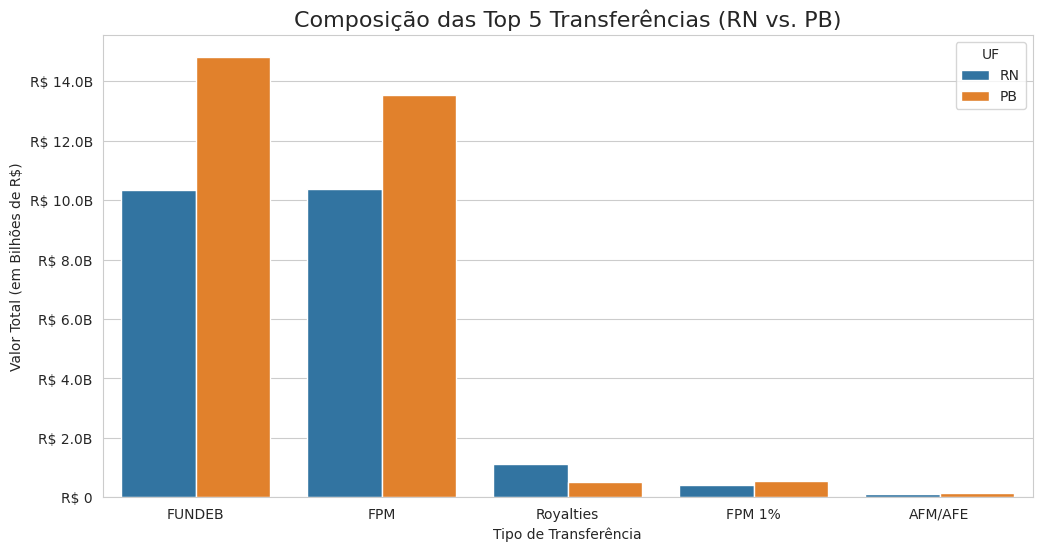

In [5]:
# PERGUNTA 3: Qual a composição das transferências?
total_por_tipo = df_rn_pb.groupby(['Transferência', 'UF'])['Valor_Total'].sum().unstack(level=1).fillna(0)

# Calcular o percentual de cada transferência (como % do total do estado)
total_por_tipo_pct = total_por_tipo.div(total_por_tipo.sum(axis=0), axis=0) * 100

print("--- Composição das Transferências (% do Total por Estado) ---")
print(total_por_tipo_pct.sort_values(by='PB', ascending=False).to_markdown(floatfmt=",.2f"))

# --- Visualização (Top 5 tipos de repasse) ---
top_tipos_idx = total_por_tipo.sum(axis=1).nlargest(5).index
df_plot_tipos_agregado = total_por_tipo.T.loc[['RN', 'PB'], top_tipos_idx].stack().reset_index()
df_plot_tipos_agregado.columns = ['UF', 'Transferência', 'Valor_Total']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_plot_tipos_agregado, 
    x='Transferência', 
    y='Valor_Total', 
    hue='UF',
    order=top_tipos_idx
)
ax.set_title('Composição das Top 5 Transferências (RN vs. PB)', fontsize=16)
ax.set_ylabel('Valor Total (em Bilhões de R$)')
ax.set_xlabel('Tipo de Transferência')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(format_currency))
plt.show()

## Seção 2: Análise Estatística Avançada (Transformando Informação em Conhecimento)

As análises anteriores nos deram uma visão geral (a **Informação**). Agora, vamos aplicar métodos estatísticos mais profundos para gerar **Conhecimento**.

1.  **Insight 1 (Volatilidade):** A Análise 1.3 mostrou que o RN depende mais de Royalties. Mas essa receita é estável? Vamos usar o **Desvio Padrão** e o **Coeficiente de Variação (CV)** para medir o risco.
2.  **Insight 2 (Distorção):** A Análise 1.1 mostrou que a PB arrecada mais. Mas isso é justo? Vamos usar uma **fonte de dados secundária (IBGE)** para fazer uma análise **Per Capita**.

In [6]:
# PERGUNTA 4: Qual fonte de receita é mais volátil?

# Filtrar para FPM e Royalties
transferencias_interesse = ['FPM', 'Royalties']
df_volatilidade = df_rn_pb[df_rn_pb['Transferência'].isin(transferencias_interesse)]

# Criar a tabela pivot com dados mensais
df_pivot = df_volatilidade.pivot_table(
    index='AnoMes',
    columns=['UF', 'Transferência'],
    values='Valor_Total',
    aggfunc='sum',
    fill_value=0 
)
df_pivot.columns = ['_'.join(col) for col in df_pivot.columns]

# TRATAMENTO DE DADO AUSENTE: O notebook original menciona a exclusão de Set/2024.
# Para a análise de série temporal, precisamos preencher essa lacuna.
# Usaremos interpolação linear (estimar o valor com base em Agosto e Outubro).
df_pivot.replace(0, np.nan, inplace=True) # Substitui 0 por NaN para interpolar
df_pivot.interpolate(method='linear', inplace=True)

#1. Calcular a Média Mensal
stats_mean = df_pivot.mean()
#2. Calcular o Desvio Padrão (Risco Absoluto)
stats_std = df_pivot.std()
# 3. Calcular o Coeficiente de Variação (CV) (Risco Relativo)
stats_cv = (stats_std / stats_mean) * 100

# Criar um DataFrame final com os resultados
df_stats_volatilidade = pd.DataFrame({
    'Media_Mensal_R$': stats_mean,
    'Desvio_Padrao_R$': stats_std,
    'Coef_Variacao_%': stats_cv
})

# Ordenar pelo CV para destacar a maior volatilidade
df_stats_volatilidade_sorted = df_stats_volatilidade.sort_values(by='Coef_Variacao_%', ascending=False)

print("--- Análise de Volatilidade (Risco) dos Repasses Mensais (FPM vs. Royalties) ---")
print(df_stats_volatilidade_sorted.to_markdown(floatfmt=",.2f"))

--- Análise de Volatilidade (Risco) dos Repasses Mensais (FPM vs. Royalties) ---
|              |   Media_Mensal_R$ |   Desvio_Padrao_R$ |   Coef_Variacao_% |
|:-------------|------------------:|-------------------:|------------------:|
| PB_Royalties |     16,300,545.74 |       7,531,821.63 |             46.21 |
| RN_Royalties |     34,435,436.76 |      15,538,325.92 |             45.12 |
| PB_FPM       |    423,433,587.65 |     119,661,523.63 |             28.26 |
| RN_FPM       |    324,265,560.54 |      91,250,110.07 |             28.14 |


In [7]:
# PERGUNTA 5: Qual município realmente recebe mais (por habitante)?

# --- 2.2.1: Agregar o total por município ---
total_por_municipio = df_rn_pb.groupby(['Município', 'UF'])['Valor_Total'].sum().reset_index()
total_por_municipio.rename(columns={'Valor_Total': 'Valor_Total_Periodo'}, inplace=True)

# --- 2.2.2: Carregar a Fonte de Dados Secundária (IBGE Censo 2022) ---
# Esta lista foi curada e limpa (tratamento de dados) para corresponder aos nomes do CSV
data_populacao = [
    {'Município': 'Acari', 'UF': 'RN', 'Populacao': 10403},
    {'Município': 'Afonso Bezerra', 'UF': 'RN', 'Populacao': 10118},
    {'Município': 'Água Nova', 'UF': 'RN', 'Populacao': 3105},
    {'Município': 'Alexandria', 'UF': 'RN', 'Populacao': 12537},
    {'Município': 'Almino Afonso', 'UF': 'RN', 'Populacao': 4627},
    {'Município': 'Alto do Rodrigues', 'UF': 'RN', 'Populacao': 13955},
    {'Município': 'Angicos', 'UF': 'RN', 'Populacao': 11331},
    {'Município': 'Antônio Martins', 'UF': 'RN', 'Populacao': 6775},
    {'Município': 'Apodi', 'UF': 'RN', 'Populacao': 36093},
    {'Município': 'Areia Branca', 'UF': 'RN', 'Populacao': 24108},
    {'Município': 'Arês', 'UF': 'RN', 'Populacao': 13627},
    {'Município': 'Augusto Severo', 'UF': 'RN', 'Populacao': 9274},
    {'Município': 'Baía Formosa', 'UF': 'RN', 'Populacao': 8769},
    {'Município': 'Baraúna', 'UF': 'RN', 'Populacao': 26978},
    {'Município': 'Barcelona', 'UF': 'RN', 'Populacao': 4004},
    {'Município': 'Bento Fernandes', 'UF': 'RN', 'Populacao': 5506},
    {'Município': 'Bodó', 'UF': 'RN', 'Populacao': 2197},
    {'Município': 'Bom Jesus', 'UF': 'RN', 'Populacao': 10214},
    {'Município': 'Brejinho', 'UF': 'RN', 'Populacao': 12285},
    {'Município': 'Caiçara do Norte', 'UF': 'RN', 'Populacao': 6224},
    {'Município': 'Caiçara do Rio do Vento', 'UF': 'RN', 'Populacao': 3617},
    {'Município': 'Caicó', 'UF': 'RN', 'Populacao': 64731},
    {'Município': 'Campo Redondo', 'UF': 'RN', 'Populacao': 10738},
    {'Município': 'Canguaretama', 'UF': 'RN', 'Populacao': 35249},
    {'Município': 'Caraúbas', 'UF': 'RN', 'Populacao': 19574},
    {'Município': 'Carnaúba dos Dantas', 'UF': 'RN', 'Populacao': 6766},
    {'Município': 'Carnaubais', 'UF': 'RN', 'Populacao': 10243},
    {'Município': 'Ceará-Mirim', 'UF': 'RN', 'Populacao': 73895},
    {'Município': 'Cerro Corá', 'UF': 'RN', 'Populacao': 10761},
    {'Município': 'Coronel Ezequiel', 'UF': 'RN', 'Populacao': 4872},
    {'Município': 'Coronel João Pessoa', 'UF': 'RN', 'Populacao': 2932},
    {'Município': 'Cruzeta', 'UF': 'RN', 'Populacao': 7311},
    {'Município': 'Currais Novos', 'UF': 'RN', 'Populacao': 41318},
    {'Município': 'Doutor Severiano', 'UF': 'RN', 'Populacao': 6645},
    {'Município': 'Parnamirim', 'UF': 'RN', 'Populacao': 252716},
    {'Município': 'Encanto', 'UF': 'RN', 'Populacao': 5550},
    {'Município': 'Equador', 'UF': 'RN', 'Populacao': 5658},
    {'Município': 'Espírito Santo', 'UF': 'RN', 'Populacao': 10582},
    {'Município': 'Extremoz', 'UF': 'RN', 'Populacao': 61571},
    {'Município': 'Felipe Guerra', 'UF': 'RN', 'Populacao': 6003},
    {'Município': 'Fernando Pedroza', 'UF': 'RN', 'Populacao': 2933},
    {'Município': 'Florânia', 'UF': 'RN', 'Populacao': 9005},
    {'Município': 'Francisco Dantas', 'UF': 'RN', 'Populacao': 2707},
    {'Município': 'Frutuoso Gomes', 'UF': 'RN', 'Populacao': 3998},
    {'Município': 'Galinhos', 'UF': 'RN', 'Populacao': 2826},
    {'Município': 'Goianinha', 'UF': 'RN', 'Populacao': 26779},
    {'Município': 'Governador Dix-Sept Rosado', 'UF': 'RN', 'Populacao': 12056},
    {'Município': 'Grossos', 'UF': 'RN', 'Populacao': 10173},
    {'Município': 'Guamaré', 'UF': 'RN', 'Populacao': 15729},
    {'Município': 'Ielmo Marinho', 'UF': 'RN', 'Populacao': 13681},
    {'Município': 'Ipanguaçu', 'UF': 'RN', 'Populacao': 15557},
    {'Município': 'Ipueira', 'UF': 'RN', 'Populacao': 2157},
    {'Município': 'Itajá', 'UF': 'RN', 'Populacao': 7523},
    {'Município': 'Itaú', 'UF': 'RN', 'Populacao': 5851},
    {'Município': 'Jaçanã', 'UF': 'RN', 'Populacao': 7701},
    {'Município': 'Jandaíra', 'UF': 'RN', 'Populacao': 6614},
    {'Município': 'Janduís', 'UF': 'RN', 'Populacao': 5110},
    {'Município': 'Januário Cicco', 'UF': 'RN', 'Populacao': 9029},
    {'Município': 'Japi', 'UF': 'RN', 'Populacao': 5440},
    {'Município': 'Jardim de Angicos', 'UF': 'RN', 'Populacao': 2526},
    {'Município': 'Jardim de Piranhas', 'UF': 'RN', 'Populacao': 13788},
    {'Município': 'Jardim do Seridó', 'UF': 'RN', 'Populacao': 11370},
    {'Município': 'João Câmara', 'UF': 'RN', 'Populacao': 33146},
    {'Município': 'João Dias', 'UF': 'RN', 'Populacao': 2552},
    {'Município': 'José da Penha', 'UF': 'RN', 'Populacao': 5635},
    {'Município': 'Jucurutu', 'UF': 'RN', 'Populacao': 17621},
    {'Município': 'Jundiá', 'UF': 'RN', 'Populacao': 3824},
    {'Município': 'Lagoa Nova', 'UF': 'RN', 'Populacao': 14945},
    {'Município': 'Lagoa Salgada', 'UF': 'RN', 'Populacao': 7713},
    {'Município': 'Lagoa DAnta', 'UF': 'RN', 'Populacao': 6176},
    {'Município': 'Lagoa de Pedras', 'UF': 'RN', 'Populacao': 6770},
    {'Município': 'Lagoa de Velhos', 'UF': 'RN', 'Populacao': 2673},
    {'Município': 'Lajes', 'UF': 'RN', 'Populacao': 10340},
    {'Município': 'Lajes Pintadas', 'UF': 'RN', 'Populacao': 4613},
    {'Município': 'Lucrécia', 'UF': 'RN', 'Populacao': 3915},
    {'Município': 'Luís Gomes', 'UF': 'RN', 'Populacao': 9024},
    {'Município': 'Macaíba', 'UF': 'RN', 'Populacao': 82259},
    {'Município': 'Macau', 'UF': 'RN', 'Populacao': 27367},
    {'Município': 'Major Sales', 'UF': 'RN', 'Populacao': 3981},
    {'Município': 'Marcelino Vieira', 'UF': 'RN', 'Populacao': 7866},
    {'Município': 'Martins', 'UF': 'RN', 'Populacao': 8157},
    {'Município': 'Maxaranguape', 'UF': 'RN', 'Populacao': 12386},
    {'Município': 'Messias Targino', 'UF': 'RN', 'Populacao': 4301},
    {'Município': 'Montanhas', 'UF': 'RN', 'Populacao': 11226},
    {'Município': 'Monte Alegre', 'UF': 'RN', 'Populacao': 22731},
    {'Município': 'Monte das Gameleiras', 'UF': 'RN', 'Populacao': 2073},
    {'Município': 'Mossoró', 'UF': 'RN', 'Populacao': 264567},
    {'Município': 'Natal', 'UF': 'RN', 'Populacao': 751300},
    {'Município': 'Nísia Floresta', 'UF': 'RN', 'Populacao': 28286},
    {'Município': 'Nova Cruz', 'UF': 'RN', 'Populacao': 34293},
    {'Município': 'Olho-DÁgua do Borges', 'UF': 'RN', 'Populacao': 4130},
    {'Município': 'Ouro Branco', 'UF': 'RN', 'Populacao': 4668},
    {'Município': 'Paraná', 'UF': 'RN', 'Populacao': 4004},
    {'Município': 'Paraú', 'UF': 'RN', 'Populacao': 3894},
    {'Município': 'Parazinho', 'UF': 'RN', 'Populacao': 5231},
    {'Município': 'Parelhas', 'UF': 'RN', 'Populacao': 21499},
    {'Município': 'Rio do Fogo', 'UF': 'RN', 'Populacao': 10565},
    {'Município': 'Passa e Fica', 'UF': 'RN', 'Populacao': 12984},
    {'Município': 'Passagem', 'UF': 'RN', 'Populacao': 3103},
    {'Município': 'Patu', 'UF': 'RN', 'Populacao': 12166},
    {'Município': 'Santa Maria', 'UF': 'RN', 'Populacao': 4940},
    {'Município': 'Pau dos Ferros', 'UF': 'RN', 'Populacao': 30478},
    {'Município': 'Pedra Grande', 'UF': 'RN', 'Populacao': 3557},
    {'Município': 'Pedra Preta', 'UF': 'RN', 'Populacao': 2404},
    {'Município': 'Pedro Avelino', 'UF': 'RN', 'Populacao': 6099},
    {'Município': 'Pedro Velho', 'UF': 'RN', 'Populacao': 13612},
    {'Município': 'Pendências', 'UF': 'RN', 'Populacao': 14945},
    {'Município': 'Pilões', 'UF': 'RN', 'Populacao': 3169},
    {'Município': 'Poço Branco', 'UF': 'RN', 'Populacao': 14144},
    {'Município': 'Portalegre', 'UF': 'RN', 'Populacao': 7486},
    {'Município': 'Porto do Mangue', 'UF': 'RN', 'Populacao': 6223},
    {'Município': 'Serra Caiada', 'UF': 'RN', 'Populacao': 10248},
    {'Município': 'Pureza', 'UF': 'RN', 'Populacao': 9062},
    {'Município': 'Rafael Fernandes', 'UF': 'RN', 'Populacao': 4950},
    {'Município': 'Rafael Godeiro', 'UF': 'RN', 'Populacao': 3065},
    {'Município': 'Riacho da Cruz', 'UF': 'RN', 'Populacao': 3438},
    {'Município': 'Riacho de Santana', 'UF': 'RN', 'Populacao': 4057},
    {'Município': 'Riachuelo', 'UF': 'RN', 'Populacao': 7954},
    {'Município': 'Rodolfo Fernandes', 'UF': 'RN', 'Populacao': 4402},
    {'Município': 'Tibau', 'UF': 'RN', 'Populacao': 5364},
    {'Município': 'Ruy Barbosa', 'UF': 'RN', 'Populacao': 3656},
    {'Município': 'Santa Cruz', 'UF': 'RN', 'Populacao': 37313},
    {'Município': 'Santana do Matos', 'UF': 'RN', 'Populacao': 12534},
    {'Município': 'Santana do Seridó', 'UF': 'RN', 'Populacao': 2595},
    {'Município': 'Santo Antônio', 'UF': 'RN', 'Populacao': 22295},
    {'Município': 'São Bento do Norte', 'UF': 'RN', 'Populacao': 2649},
    {'Município': 'São Bento do Trairí', 'UF': 'RN', 'Populacao': 4549},
    {'Município': 'São Fernando', 'UF': 'RN', 'Populacao': 3409},
    {'Município': 'São Francisco do Oeste', 'UF': 'RN', 'Populacao': 4181},
    {'Município': 'São Gonçalo do Amarante', 'UF': 'RN', 'Populacao': 115838},
    {'Município': 'São João do Sabugi', 'UF': 'RN', 'Populacao': 5733},
    {'Município': 'São José de Mipibu', 'UF': 'RN', 'Populacao': 47285},
    {'Município': 'São José do Campestre', 'UF': 'RN', 'Populacao': 11880},
    {'Município': 'São José do Seridó', 'UF': 'RN', 'Populacao': 4668},
    {'Município': 'São Miguel', 'UF': 'RN', 'Populacao': 23537},
    {'Município': 'São Miguel do Gostoso', 'UF': 'RN', 'Populacao': 10243},
    {'Município': 'São Paulo do Potengi', 'UF': 'RN', 'Populacao': 16794},
    {'Município': 'São Pedro', 'UF': 'RN', 'Populacao': 6098},
    {'Município': 'São Rafael', 'UF': 'RN', 'Populacao': 8152},
    {'Município': 'São Tomé', 'UF': 'RN', 'Populacao': 10565},
    {'Município': 'São Vicente', 'UF': 'RN', 'Populacao': 6310},
    {'Município': 'Senador Elói de Souza', 'UF': 'RN', 'Populacao': 5472},
    {'Município': 'Senador Georgino Avelino', 'UF': 'RN', 'Populacao': 4478},
    {'Município': 'Serra de São Bento', 'UF': 'RN', 'Populacao': 5727},
    {'Município': 'Serra do Mel', 'UF': 'RN', 'Populacao': 11985},
    {'Município': 'Serra Negra do Norte', 'UF': 'RN', 'Populacao': 7644},
    {'Município': 'Serrinha', 'UF': 'RN', 'Populacao': 7867},
    {'Município': 'Serrinha dos Pintos', 'UF': 'RN', 'Populacao': 4709},
    {'Município': 'Severiano Melo', 'UF': 'RN', 'Populacao': 2231},
    {'Município': 'Sítio Novo', 'UF': 'RN', 'Populacao': 5100},
    {'Município': 'Taboleiro Grande', 'UF': 'RN', 'Populacao': 2555},
    {'Município': 'Taipu', 'UF': 'RN', 'Populacao': 12028},
    {'Município': 'Tangará', 'UF': 'RN', 'Populacao': 15206},
    {'Município': 'Tenente Ananias', 'UF': 'RN', 'Populacao': 10223},
    {'Município': 'Tenente Laurentino Cruz', 'UF': 'RN', 'Populacao': 5581},
    {'Município': 'Tibau do Sul', 'UF': 'RN', 'Populacao': 17094},
    {'Município': 'Timbaúba dos Batistas', 'UF': 'RN', 'Populacao': 2336},
    {'Município': 'Touros', 'UF': 'RN', 'Populacao': 33029},
    {'Município': 'Triunfo Potiguar', 'UF': 'RN', 'Populacao': 3241},
    {'Município': 'Umarizal', 'UF': 'RN', 'Populacao': 10476},
    {'Município': 'Upanema', 'UF': 'RN', 'Populacao': 13663},
    {'Município': 'Várzea', 'UF': 'RN', 'Populacao': 5174},
    {'Município': 'Venha-Ver', 'UF': 'RN', 'Populacao': 3937},
    {'Município': 'Vera Cruz', 'UF': 'RN', 'Populacao': 12061},
    {'Município': 'Viçosa', 'UF': 'RN', 'Populacao': 1695},
    {'Município': 'Vila Flor', 'UF': 'RN', 'Populacao': 3105},
    {'Município': 'Aguiar', 'UF': 'PB', 'Populacao': 5057},
    {'Município': 'Alagoa Grande', 'UF': 'PB', 'Populacao': 26036},
    {'Município': 'Alagoa Nova', 'UF': 'PB', 'Populacao': 19047},
    {'Município': 'Alagoinha', 'UF': 'PB', 'Populacao': 13538},
    {'Município': 'Alcantil', 'UF': 'PB', 'Populacao': 5293},
    {'Município': 'Algodão de Jandaíra', 'UF': 'PB', 'Populacao': 2341},
    {'Município': 'Alhandra', 'UF': 'PB', 'Populacao': 21743},
    {'Município': 'São João do Rio do Peixe', 'UF': 'PB', 'Populacao': 17409},
    {'Município': 'Amparo', 'UF': 'PB', 'Populacao': 2197},
    {'Município': 'Aparecida', 'UF': 'PB', 'Populacao': 7701},
    {'Município': 'Araçagi', 'UF': 'PB', 'Populacao': 16127},
    {'Município': 'Arara', 'UF': 'PB', 'Populacao': 12221},
    {'Município': 'Araruna', 'UF': 'PB', 'Populacao': 18884},
    {'Município': 'Areia', 'UF': 'PB', 'Populacao': 22622},
    {'Município': 'Areia de Baraúnas', 'UF': 'PB', 'Populacao': 1883},
    {'Município': 'Areial', 'UF': 'PB', 'Populacao': 6777},
    {'Município': 'Aroeiras', 'UF': 'PB', 'Populacao': 17798},
    {'Município': 'Assunção', 'UF': 'PB', 'Populacao': 3827},
    {'Município': 'Baía da Traição', 'UF': 'PB', 'Populacao': 9205},
    {'Município': 'Bananeiras', 'UF': 'PB', 'Populacao': 23214},
    {'Município': 'Baraúna', 'UF': 'PB', 'Populacao': 4496},
    {'Município': 'Barra de Santa Rosa', 'UF': 'PB', 'Populacao': 14801},
    {'Município': 'Barra de Santana', 'UF': 'PB', 'Populacao': 8150},
    {'Município': 'Barra de São Miguel', 'UF': 'PB', 'Populacao': 5738},
    {'Município': 'Bayeux', 'UF': 'PB', 'Populacao': 82635},
    {'Município': 'Belém', 'UF': 'PB', 'Populacao': 16298},
    {'Município': 'Belém do Brejo do Cruz', 'UF': 'PB', 'Populacao': 6479},
    {'Município': 'Bernardino Batista', 'UF': 'PB', 'Populacao': 3543},
    {'Município': 'Boa Ventura', 'UF': 'PB', 'Populacao': 5220},
    {'Município': 'Boa Vista', 'UF': 'PB', 'Populacao': 6701},
    {'Município': 'Bom Jesus', 'UF': 'PB', 'Populacao': 2452},
    {'Município': 'Bom Sucesso', 'UF': 'PB', 'Populacao': 4639},
    {'Município': 'Bonito de Santa Fé', 'UF': 'PB', 'Populacao': 10243},
    {'Município': 'Boqueirão', 'UF': 'PB', 'Populacao': 16892},
    {'Município': 'Igaracy', 'UF': 'PB', 'Populacao': 5600},
    {'Município': 'Borborema', 'UF': 'PB', 'Populacao': 4967},
    {'Município': 'Brejo do Cruz', 'UF': 'PB', 'Populacao': 12976},
    {'Município': 'Brejo dos Santos', 'UF': 'PB', 'Populacao': 5754},
    {'Município': 'Caaporã', 'UF': 'PB', 'Populacao': 22295},
    {'Município': 'Cabaceiras', 'UF': 'PB', 'Populacao': 5025},
    {'Município': 'Cabedelo', 'UF': 'PB', 'Populacao': 66868},
    {'Município': 'Cachoeira dos Índios', 'UF': 'PB', 'Populacao': 9568},
    {'Município': 'Cacimba de Areia', 'UF': 'PB', 'Populacao': 3381},
    {'Município': 'Cacimba de Dentro', 'UF': 'PB', 'Populacao': 16182},
    {'Município': 'Cacimbas', 'UF': 'PB', 'Populacao': 7367},
    {'Município': 'Caiçara', 'UF': 'PB', 'Populacao': 6750},
    {'Município': 'Cajazeiras', 'UF': 'PB', 'Populacao': 63239},
    {'Município': 'Cajazeirinhas', 'UF': 'PB', 'Populacao': 3241},
    {'Município': 'Caldas Brandão', 'UF': 'PB', 'Populacao': 6176},
    {'Município': 'Camalaú', 'UF': 'PB', 'Populacao': 5697},
    {'Município': 'Campina Grande', 'UF': 'PB', 'Populacao': 419379},
    {'Município': 'Capim', 'UF': 'PB', 'Populacao': 6766},
    {'Município': 'Caraúbas', 'UF': 'PB', 'Populacao': 3937},
    {'Município': 'Carrapateira', 'UF': 'PB', 'Populacao': 2673},
    {'Município': 'Casserengue', 'UF': 'PB', 'Populacao': 6896},
    {'Município': 'Catingueira', 'UF': 'PB', 'Populacao': 4791},
    {'Município': 'Catolé do Rocha', 'UF': 'PB', 'Populacao': 30653},
    {'Município': 'Caturité', 'UF': 'PB', 'Populacao': 4831},
    {'Município': 'Conceição', 'UF': 'PB', 'Populacao': 18192},
    {'Município': 'Condado', 'UF': 'PB', 'Populacao': 6571},
    {'Município': 'Conde', 'UF': 'PB', 'Populacao': 26868},
    {'Município': 'Congo', 'UF': 'PB', 'Populacao': 4831},
    {'Município': 'Coremas', 'UF': 'PB', 'Populacao': 14619},
    {'Município': 'Coxixola', 'UF': 'PB', 'Populacao': 2826},
    {'Município': 'Cruz do Espírito Santo', 'UF': 'PB', 'Populacao': 17926},
    {'Município': 'Cubati', 'UF': 'PB', 'Populacao': 7093},
    {'Município': 'Cuité', 'UF': 'PB', 'Populacao': 19996},
    {'Município': 'Cuitegi', 'UF': 'PB', 'Populacao': 6724},
    {'Município': 'Cuité de Mamanguape', 'UF': 'PB', 'Populacao': 6176},
    {'Município': 'Curral de Cima', 'UF': 'PB', 'Populacao': 5293},
    {'Município': 'Curral Velho', 'UF': 'PB', 'Populacao': 2673},
    {'Município': 'Damião', 'UF': 'PB', 'Populacao': 5099},
    {'Município': 'Desterro', 'UF': 'PB', 'Populacao': 7954},
    {'Município': 'Vista Serrana', 'UF': 'PB', 'Populacao': 3656},
    {'Município': 'Diamante', 'UF': 'PB', 'Populacao': 6224},
    {'Município': 'Dona Inês', 'UF': 'PB', 'Populacao': 10599},
    {'Município': 'Duas Estradas', 'UF': 'PB', 'Populacao': 3543},
    {'Município': 'Emas', 'UF': 'PB', 'Populacao': 3381},
    {'Município': 'Esperança', 'UF': 'PB', 'Populacao': 31131},
    {'Município': 'Fagundes', 'UF': 'PB', 'Populacao': 10738},
    {'Município': 'Frei Martinho', 'UF': 'PB', 'Populacao': 2865},
    {'Município': 'Gado Bravo', 'UF': 'PB', 'Populacao': 8152},
    {'Município': 'Guarabira', 'UF': 'PB', 'Populacao': 57434},
    {'Município': 'Gurinhém', 'UF': 'PB', 'Populacao': 13627},
    {'Município': 'Gurjão', 'UF': 'PB', 'Populacao': 2932},
    {'Município': 'Ibiara', 'UF': 'PB', 'Populacao': 5851},
    {'Município': 'Imaculada', 'UF': 'PB', 'Populacao': 10988},
    {'Município': 'Ingá', 'UF': 'PB', 'Populacao': 17798},
    {'Município': 'Itabaiana', 'UF': 'PB', 'Populacao': 22896},
    {'Município': 'Itaporanga', 'UF': 'PB', 'Populacao': 23182},
    {'Município': 'Itapororoca', 'UF': 'PB', 'Populacao': 17316},
    {'Município': 'Itatuba', 'UF': 'PB', 'Populacao': 10940},
    {'Município': 'Jacaraú', 'UF': 'PB', 'Populacao': 13861},
    {'Município': 'Jericó', 'UF': 'PB', 'Populacao': 6571},
    {'Município': 'João Pessoa', 'UF': 'PB', 'Populacao': 833932},
    {'Município': 'Juarez Távora', 'UF': 'PB', 'Populacao': 7701},
    {'Município': 'Juazeirinho', 'UF': 'PB', 'Populacao': 17926},
    {'Município': 'Junco do Seridó', 'UF': 'PB', 'Populacao': 6940},
    {'Município': 'Juripiranga', 'UF': 'PB', 'Populacao': 10214},
    {'Município': 'Juru', 'UF': 'PB', 'Populacao': 8649},
    {'Município': 'Lagoa', 'UF': 'PB', 'Populacao': 4668},
    {'Município': 'Lagoa Seca', 'UF': 'PB', 'Populacao': 27730},
    {'Município': 'Lagoa de Dentro', 'UF': 'PB', 'Populacao': 7367},
    {'Município': 'Lastro', 'UF': 'PB', 'Populacao': 2673},
    {'Município': 'Livramento', 'UF': 'PB', 'Populacao': 6940},
    {'Município': 'Logradouro', 'UF': 'PB', 'Populacao': 4264},
    {'Município': 'Lucena', 'UF': 'PB', 'Populacao': 12560},
    {'Município': 'Mãe DÁgua', 'UF': 'PB', 'Populacao': 3656},
    {'Município': 'Malta', 'UF': 'PB', 'Populacao': 5581},
    {'Município': 'Mamanguape', 'UF': 'PB', 'Populacao': 44599},
    {'Município': 'Manaíra', 'UF': 'PB', 'Populacao': 10582},
    {'Município': 'Marcação', 'UF': 'PB', 'Populacao': 9005},
    {'Município': 'Mari', 'UF': 'PB', 'Populacao': 21976},
    {'Município': 'Marizópolis', 'UF': 'PB', 'Populacao': 6479},
    {'Município': 'Massaranduba', 'UF': 'PB', 'Populacao': 13912},
    {'Município': 'Mataraca', 'UF': 'PB', 'Populacao': 8272},
    {'Município': 'Matinhas', 'UF': 'PB', 'Populacao': 4549},
    {'Município': 'Mato Grosso', 'UF': 'PB', 'Populacao': 2865},
    {'Município': 'Maturéia', 'UF': 'PB', 'Populacao': 6479},
    {'Município': 'Mogeiro', 'UF': 'PB', 'Populacao': 12221},
    {'Município': 'Montadas', 'UF': 'PB', 'Populacao': 5738},
    {'Município': 'Monte Horebe', 'UF': 'PB', 'Populacao': 4750},
    {'Município': 'Monteiro', 'UF': 'PB', 'Populacao': 32445},
    {'Município': 'Mulungu', 'UF': 'PB', 'Populacao': 9652},
    {'Município': 'Natuba', 'UF': 'PB', 'Populacao': 9976},
    {'Município': 'Nazarezinho', 'UF': 'PB', 'Populacao': 7093},
    {'Município': 'Nova Floresta', 'UF': 'PB', 'Populacao': 9274},
    {'Município': 'Nova Olinda', 'UF': 'PB', 'Populacao': 6016},
    {'Município': 'Nova Palmeira', 'UF': 'PB', 'Populacao': 4668},
    {'Município': 'Olho DÁgua', 'UF': 'PB', 'Populacao': 6645},
    {'Município': 'Olivedos', 'UF': 'PB', 'Populacao': 3827},
    {'Município': 'Ouro Velho', 'UF': 'PB', 'Populacao': 2932},
    {'Município': 'Parari', 'UF': 'PB', 'Populacao': 1735},
    {'Município': 'Passagem', 'UF': 'PB', 'Populacao': 2336},
    {'Município': 'Patos', 'UF': 'PB', 'Populacao': 103165},
    {'Município': 'Paulista', 'UF': 'PB', 'Populacao': 12285},
    {'Município': 'Pedra Branca', 'UF': 'PB', 'Populacao': 3656},
    {'Município': 'Pedra Lavrada', 'UF': 'PB', 'Populacao': 7486},
    {'Município': 'Pedras de Fogo', 'UF': 'PB', 'Populacao': 28842},
    {'Município': 'Piancó', 'UF': 'PB', 'Populacao': 15557},
    {'Município': 'Picuí', 'UF': 'PB', 'Populacao': 17798},
    {'Município': 'Pilar', 'UF': 'PB', 'Populacao': 11417},
    {'Município': 'Pilões', 'UF': 'PB', 'Populacao': 6479},
    {'Município': 'Pilõezinhos', 'UF': 'PB', 'Populacao': 5025},
    {'Município': 'Pirpirituba', 'UF': 'PB', 'Populacao': 10214},
    {'Município': 'Pitimbu', 'UF': 'PB', 'Populacao': 19183},
    {'Município': 'Pocinhos', 'UF': 'PB', 'Populacao': 17926},
    {'Município': 'Poço Dantas', 'UF': 'PB', 'Populacao': 3737},
    {'Município': 'Poço de José de Moura', 'UF': 'PB', 'Populacao': 4181},
    {'Município': 'Pombal', 'UF': 'PB', 'Populacao': 32207},
    {'Município': 'Prata', 'UF': 'PB', 'Populacao': 3937},
    {'Município': 'Princesa Isabel', 'UF': 'PB', 'Populacao': 22731},
    {'Município': 'Puxinanã', 'UF': 'PB', 'Populacao': 13861},
    {'Município': 'Queimadas', 'UF': 'PB', 'Populacao': 44436},
    {'Município': 'Quixabá', 'UF': 'PB', 'Populacao': 1695},
    {'Município': 'Remígio', 'UF': 'PB', 'Populacao': 19741},
    {'Município': 'Pedro Régis', 'UF': 'PB', 'Populacao': 5658},
    {'Município': 'Riachão', 'UF': 'PB', 'Populacao': 3381},
    {'Município': 'Riachão do Bacamarte', 'UF': 'PB', 'Populacao': 4549},
    {'Município': 'Riachão do Poço', 'UF': 'PB', 'Populacao': 4496},
    {'Município': 'Riacho de Santo Antônio', 'UF': 'PB', 'Populacao': 1924},
    {'Município': 'Riacho dos Cavalos', 'UF': 'PB', 'Populacao': 8152},
    {'Município': 'Rio Tinto', 'UF': 'PB', 'Populacao': 24451},
    {'Município': 'Salgadinho', 'UF': 'PB', 'Populacao': 3381},
    {'Município': 'Salgado de São Félix', 'UF': 'PB', 'Populacao': 11463},
    {'Município': 'Santa Cecília', 'UF': 'PB', 'Populacao': 6571},
    {'Município': 'Santa Cruz', 'UF': 'PB', 'Populacao': 6016},
    {'Município': 'Santa Helena', 'UF': 'PB', 'Populacao': 5581},
    {'Município': 'Santa Inês', 'UF': 'PB', 'Populacao': 3656},
    {'Município': 'Santa Luzia', 'UF': 'PB', 'Populacao': 15152},
    {'Município': 'Santana de Mangueira', 'UF': 'PB', 'Populacao': 5025},
    {'Município': 'Santana dos Garrotes', 'UF': 'PB', 'Populacao': 6896},
    {'Município': 'Joca Claudino', 'UF': 'PB', 'Populacao': 2552},
    {'Município': 'Santa Rita', 'UF': 'PB', 'Populacao': 149910},
    {'Município': 'Santa Teresinha', 'UF': 'PB', 'Populacao': 4496},
    {'Município': 'Santo André', 'UF': 'PB', 'Populacao': 2514},
    {'Município': 'São Bento', 'UF': 'PB', 'Populacao': 30879},
    {'Município': 'São Bentinho', 'UF': 'PB', 'Populacao': 4402},
    {'Município': 'São Domingos do Cariri', 'UF': 'PB', 'Populacao': 2595},
    {'Município': 'São Domingos', 'UF': 'PB', 'Populacao': 2826},
    {'Município': 'São Francisco', 'UF': 'PB', 'Populacao': 3105},
    {'Município': 'São José da Lagoa Tapada', 'UF': 'PB', 'Populacao': 7192},
    {'Município': 'São José de Caiana', 'UF': 'PB', 'Populacao': 5738},
    {'Município': 'São José de Espinharas', 'UF': 'PB', 'Populacao': 4301},
    {'Município': 'São José dos Ramos', 'UF': 'PB', 'Populacao': 5928},
    {'Município': 'São José de Piranhas', 'UF': 'PB', 'Populacao': 19996},
    {'Município': 'São José de Princesa', 'UF': 'PB', 'Populacao': 4004},
    {'Município': 'São José do Bonfim', 'UF': 'PB', 'Populacao': 3381},
    {'Município': 'São José do Brejo do Cruz', 'UF': 'PB', 'Populacao': 1735},
    {'Município': 'São José do Sabugi', 'UF': 'PB', 'Populacao': 4004},
    {'Município': 'São Mamede', 'UF': 'PB', 'Populacao': 7523},
    {'Município': 'São Miguel de Taipu', 'UF': 'PB', 'Populacao': 6940},
    {'Município': 'São Sebastião de Lagoa de Roça', 'UF': 'PB', 'Populacao': 11370},
    {'Município': 'São Sebastião do Umbuzeiro', 'UF': 'PB', 'Populacao': 3241},
    {'Município': 'Sapé', 'UF': 'PB', 'Populacao': 52204},
    {'Município': 'Seridó', 'UF': 'PB', 'Populacao': 9274},
    {'Município': 'Serra Branca', 'UF': 'PB', 'Populacao': 13028},
    {'Município': 'Serra da Raiz', 'UF': 'PB', 'Populacao': 3169},
    {'Município': 'Serra Grande', 'UF': 'PB', 'Populacao': 2932},
    {'Município': 'Serra Redonda', 'UF': 'PB', 'Populacao': 7192},
    {'Município': 'Serraria', 'UF': 'PB', 'Populacao': 5658},
    {'Município': 'Sertãozinho', 'UF': 'PB', 'Populacao': 4496},
    {'Município': 'Sobrado', 'UF': 'PB', 'Populacao': 7701},
    {'Município': 'Solânea', 'UF': 'PB', 'Populacao': 25550},
    {'Município': 'Soledade', 'UF': 'PB', 'Populacao': 13745},
    {'Município': 'Sossêgo', 'UF': 'PB', 'Populacao': 3543},
    {'Município': 'Sousa', 'UF': 'PB', 'Populacao': 67259},
    {'Município': 'Sumé', 'UF': 'PB', 'Populacao': 16069},
    {'Município': 'Tacima', 'UF': 'PB', 'Populacao': 11068},
    {'Município': 'Taperoá', 'UF': 'PB', 'Populacao': 14801},
    {'Município': 'Tavares', 'UF': 'PB', 'Populacao': 14144},
    {'Município': 'Teixeira', 'UF': 'PB', 'Populacao': 14144},
    {'Município': 'Tenório', 'UF': 'PB', 'Populacao': 3019},
    {'Município': 'Triunfo', 'UF': 'PB', 'Populacao': 9205},
    {'Município': 'Uiraúna', 'UF': 'PB', 'Populacao': 15306},
    {'Município': 'Umbuzeiro', 'UF': 'PB', 'Populacao': 9062},
    {'Município': 'Várzea', 'UF': 'PB', 'Populacao': 2673},
    {'Município': 'Vieirópolis', 'UF': 'PB', 'Populacao': 4909},
    {'Município': 'Zabelê', 'UF': 'PB', 'Populacao': 2087},
    # --- Municípios Faltantes Adicionados ---
    {'Município': 'Açu', 'UF': 'RN', 'Populacao': 57214},
    {'Município': 'Campo Grande', 'UF': 'RN', 'Populacao': 9036},
    {'Município': 'Presidente Juscelino', 'UF': 'RN', 'Populacao': 8363},
    {'Município': 'São José dos Cordeiros', 'UF': 'PB', 'Populacao': 3674},
    {'Município': 'São João do Cariri', 'UF': 'PB', 'Populacao': 4124},
    {'Município': 'São João do Tigre', 'UF': 'PB', 'Populacao': 4307},
    {'Município': 'São Vicente do Seridó', 'UF': 'PB', 'Populacao': 10248},
    {'Município': 'Água Branca', 'UF': 'PB', 'Populacao': 9514}
]

df_populacao = pd.DataFrame(data_populacao)

print("--- DataFrame 'df_populacao' corrigido e completo. ---")
print(f"Total de municípios no arquivo de população agora: {len(df_populacao)}")
print(df_populacao.head().to_markdown(index=False))

--- DataFrame 'df_populacao' corrigido e completo. ---
Total de municípios no arquivo de população agora: 393
| Município      | UF   |   Populacao |
|:---------------|:-----|------------:|
| Acari          | RN   |       10403 |
| Afonso Bezerra | RN   |       10118 |
| Água Nova      | RN   |        3105 |
| Alexandria     | RN   |       12537 |
| Almino Afonso  | RN   |        4627 |


In [8]:
# --- 2.2.3: Juntar (Merge) Repasses e População ---
# O dataframe 'total_por_municipio' foi criado na Célula 12

df_per_capita = pd.merge(
    total_por_municipio,
    df_populacao,
    on=['Município', 'UF'],
    how='left' 
)

# Verificar se todos os municípios foram encontrados
municipios_sem_pop = df_per_capita[df_per_capita['Populacao'].isna()]
if not municipios_sem_pop.empty:
    print("\n--- ATENÇÃO: AINDA HÁ MUNICÍPIOS SEM DADOS DE POPULAÇÃO ---")
    print(municipios_sem_pop)
else:
    print("\n--- Merge realizado com sucesso! Todos os 390 municípios foram encontrados. ---")

# --- 2.2.4: Calcular o Repasse Per Capita ---
df_per_capita['Valor_Per_Capita_R$'] = df_per_capita['Valor_Total_Periodo'] / df_per_capita['Populacao']
df_per_capita_sorted = df_per_capita.sort_values(by='Valor_Per_Capita_R$', ascending=False)

# --- 2.2.5: Imprimir os Resultados ---
print("\n--- Top 10 Municípios por Repasse Per Capita (R$ por Habitante) ---")
print(df_per_capita_sorted[['UF', 'Município', 'Populacao', 'Valor_Per_Capita_R$']].head(10).to_markdown(index=False, floatfmt=",.2f"))

print("\n--- 10 Piores Municípios por Repasse Per Capita (R$ por Habitante) ---")
print(df_per_capita_sorted[['UF', 'Município', 'Populacao', 'Valor_Per_Capita_R$']].tail(10).to_markdown(index=False, floatfmt=",.2f"))


--- Merge realizado com sucesso! Todos os 390 municípios foram encontrados. ---

--- Top 10 Municípios por Repasse Per Capita (R$ por Habitante) ---
| UF   | Município                 |   Populacao |   Valor_Per_Capita_R$ |
|:-----|:--------------------------|------------:|----------------------:|
| PB   | São José do Brejo do Cruz |        1735 |             34,954.71 |
| PB   | Quixabá                   |        1695 |             31,491.73 |
| RN   | Viçosa                    |        1695 |             31,481.91 |
| PB   | Parari                    |        1735 |             29,379.75 |
| PB   | Riacho de Santo Antônio   |        1924 |             29,258.03 |
| RN   | Severiano Melo            |        2231 |             28,637.26 |
| RN   | Monte das Gameleiras      |        2073 |             28,401.51 |
| PB   | Areia de Baraúnas         |        1883 |             28,143.87 |
| PB   | Joca Claudino             |        2552 |             26,918.17 |
| PB   | Zabelê          

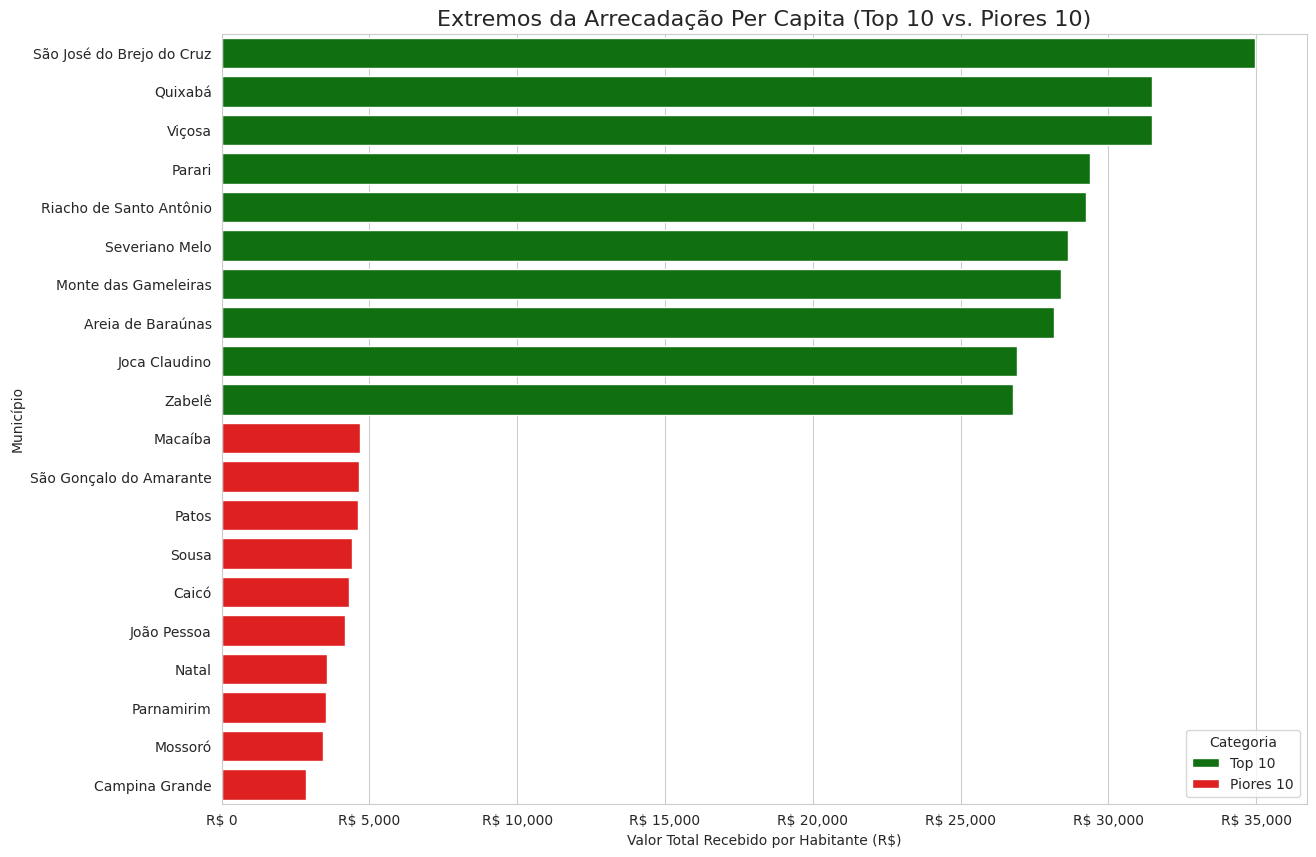

In [9]:
# --- Visualização da Análise Per Capita ---

# Criar um dataframe com os 10 melhores e 10 piores
top_10 = df_per_capita_sorted.head(10)
bottom_10 = df_per_capita_sorted.tail(10)
df_plot_per_capita = pd.concat([top_10, bottom_10]).sort_values(by='Valor_Per_Capita_R$', ascending=False)

# Adicionar uma coluna 'Categoria' para colorir o gráfico
df_plot_per_capita['Categoria'] = ['Top 10' if x in top_10.index else 'Piores 10' for x in df_plot_per_capita.index]

# Plotar
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=df_plot_per_capita,
    x='Valor_Per_Capita_R$',
    y='Município',
    hue='Categoria',
    dodge=False,
    palette={'Top 10': 'green', 'Piores 10': 'red'}
)

ax.set_title('Extremos da Arrecadação Per Capita (Top 10 vs. Piores 10)', fontsize=16)
ax.set_xlabel('Valor Total Recebido por Habitante (R$)')
ax.set_ylabel('Município')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(format_currency))
plt.legend(title='Categoria')
plt.show()

## 3. Conclusão da Análise (Conhecimento Gerado)

Esta análise comparativa, seguindo uma metodologia quantitativa, transformou dados brutos de repasses em insights estratégicos:

**Insight 1: A Paraíba arrecada mais no total (Informação).**
* A PB arrecadou **R\$ 29.6 bilhões** contra **R\$ 22.4 bilhões** do RN. A análise temporal (Análise 1.2) mostrou que a PB se mantém consistentemente acima do RN, e a análise de composição (Análise 1.3) mostrou que ambos dependem de FPM e FUNDEB.

**Insight 2: A receita do RN é mais arriscada (Conhecimento).**
* A Análise 1.3 sugeriu que o RN depende mais de Royalties (4.93% do total) que a PB (1.76%).
* A Análise de Volatilidade (Análise 2.1) **quantificou este risco**: a receita de Royalties (CV de \~45%) é **\~1.6 vez mais volátil** e imprevisível do que a receita de FPM (CV de \~28%).

**Insight 3: A distribuição de repasses favorece municípios minúsculos (Conhecimento).**
* Enquanto a Análise 1.1 apontou as capitais como as mais ricas em valor absoluto, a Análise Per Capita (Análise 2.2) **inverteu essa conclusão**.
* Os municípios mais populosos, como **Campina Grande (R\$ 2.866/hab)** e **Natal (R\$ 3.577/hab)**, estão entre os que menos recebem verba por cidadão.
* Municípios com menos de 2.000 habitantes, como **São José do Brejo do Cruz (R\$ 34.954/hab)**, recebem até **12 vezes mais** por pessoa, provavelmente devido às regras de cotas mínimas do FPM.

**Conclusão Final:** A análise superficial (valor absoluto) é insuficiente. A Paraíba arrecada mais, mas o RN possui uma fonte de receita (Royalties) mais volátil. Além disso, os maiores volumes de dinheiro não vão, proporcionalmente, para as maiores populações, indicando uma distorção significativa na distribuição de recursos federais.